In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_path="/kaggle/input/vanadium-dioxide-thermochromic/vo2_dataset.csv"
df=pd.read_csv(data_path)
df.head(5)

,Power,Temperature,O2_Ar_Ratio,Pressure,Target_Material,Substrate,Label
0,147.454012,679.710838,0.917324,2.048586,V2O5,Al2O3,0
1,205.071431,621.285812,0.122759,0.258108,VO2,NaCa Glass,0
2,183.199394,501.839410,2.001302,2.348379,V,Stainless Steel,0
3,169.865848,520.294309,0.291702,1.876726,V,SiO2,0
4,125.601864,632.700354,0.770559,0.374837,VO2,Si,1


### Taking Insights from the data

In [3]:
df.describe()

,Power,Temperature,O2_Ar_Ratio,Pressure,Label
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,158.122683,602.010036,1.165003,1.516014,0.527094
std,29.511245,58.656221,0.642960,0.773763,0.500500
min,110.552212,501.012317,0.122759,0.199803,0.000000
25%,132.721547,555.076615,0.574851,0.829864,0.000000
50%,159.379560,608.528927,1.157176,1.541194,1.000000
75%,184.377254,650.148582,1.738840,2.197905,1.000000
max,208.688694,698.101028,2.199407,2.872391,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Power            203 non-null    float64
 1   Temperature      203 non-null    float64
 2   O2_Ar_Ratio      203 non-null    float64
 3   Pressure         203 non-null    float64
 4   Target_Material  203 non-null    object 
 5   Substrate        203 non-null    object 
 6   Label            203 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 11.2+ KB


### To know about categorical values

In [5]:
df['Target_Material'].value_counts()

Target_Material
VO2     62
V       51
V2O5    46
V2O3    44
Name: count, dtype: int64

In [6]:
df['Substrate'].value_counts()

Substrate
NaCa Glass         48
Al2O3              44
Stainless Steel    41
Si                 40
SiO2               30
Name: count, dtype: int64

### Visualizing data

array([[<Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'O2_Ar_Ratio'}>,
        <Axes: title={'center': 'Pressure'}>],
       [<Axes: title={'center': 'Label'}>, <Axes: >]], dtype=object)

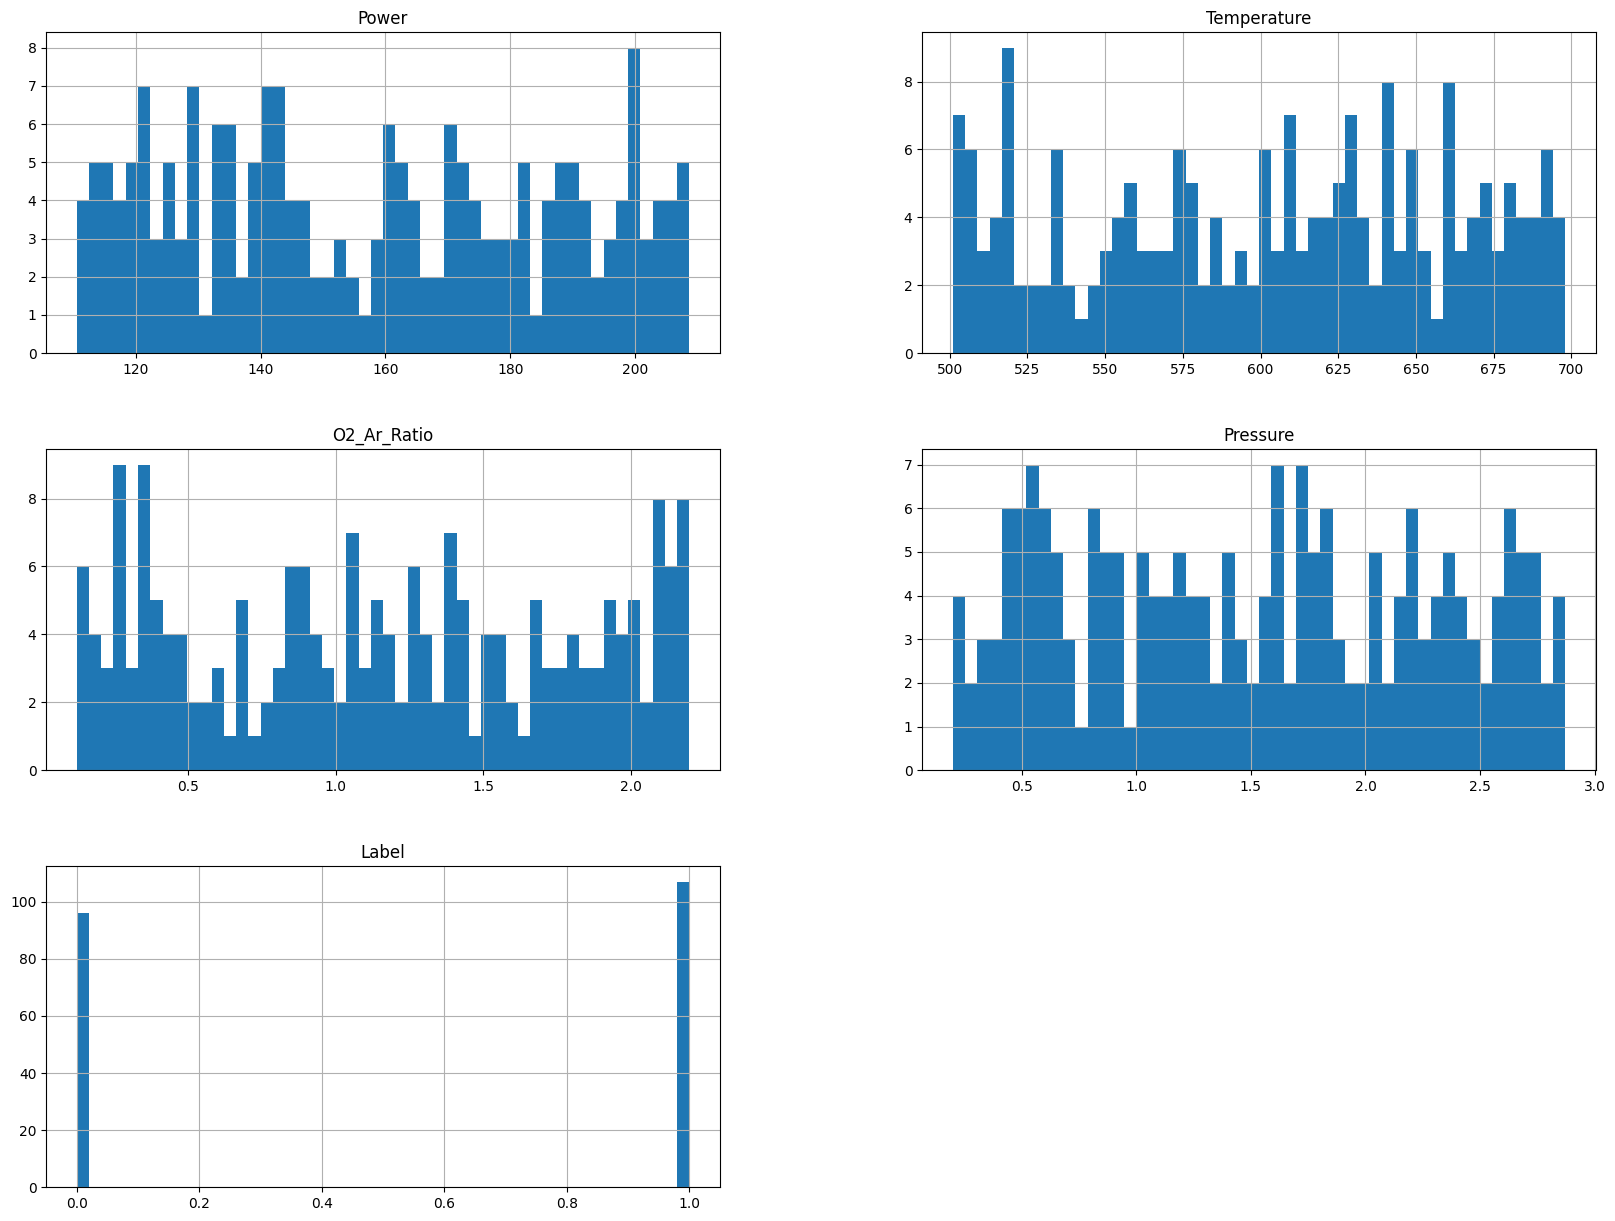

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))

### Staratified Train Test splitting

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df, df['Target_Material']):
    strat_train_set=df.iloc[train_index]
    strat_test_set=df.iloc[test_index]

In [9]:
df['Target_Material'].value_counts()/len(df)

Target_Material
VO2     0.305419
V       0.251232
V2O5    0.226601
V2O3    0.216749
Name: count, dtype: float64

In [10]:
strat_train_set['Target_Material'].value_counts()/len(df)

Target_Material
VO2     0.241379
V       0.201970
V2O5    0.182266
V2O3    0.172414
Name: count, dtype: float64

In [11]:
strat_test_set['Target_Material'].value_counts()/len(df)

Target_Material
VO2     0.064039
V       0.049261
V2O5    0.044335
V2O3    0.044335
Name: count, dtype: float64

In [12]:
data=strat_train_set.copy()

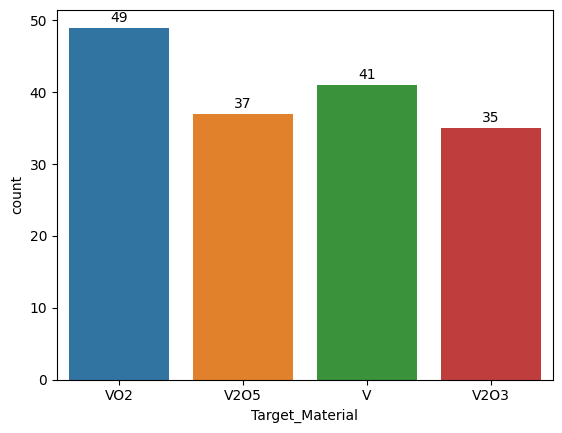

In [13]:
import seaborn as sns

sns.countplot(data=data,x='Target_Material')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

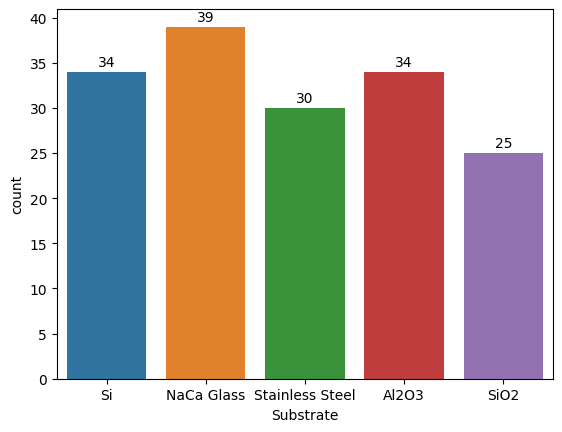

In [14]:
sns.countplot(data=data,x='Substrate')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

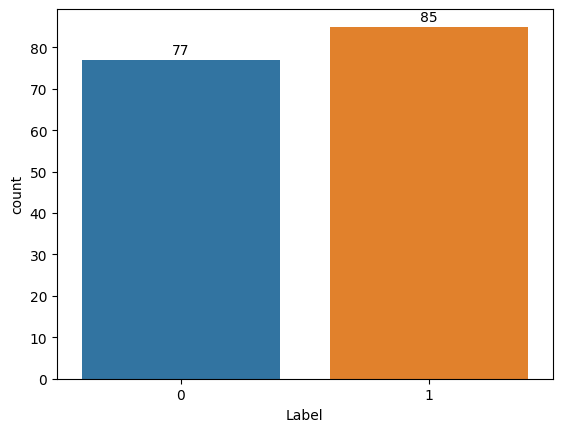

In [15]:
sns.countplot(data=data,x='Label')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

<Axes: >

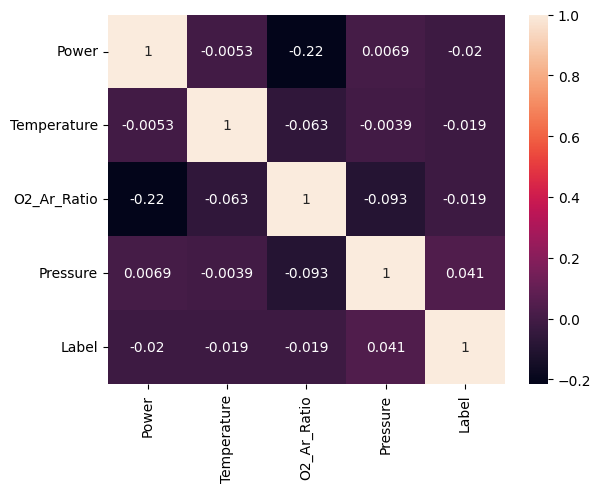

In [16]:
num_colms=data.drop(columns=['Target_Material','Substrate'])
sns.heatmap(num_colms.corr(),annot=True)

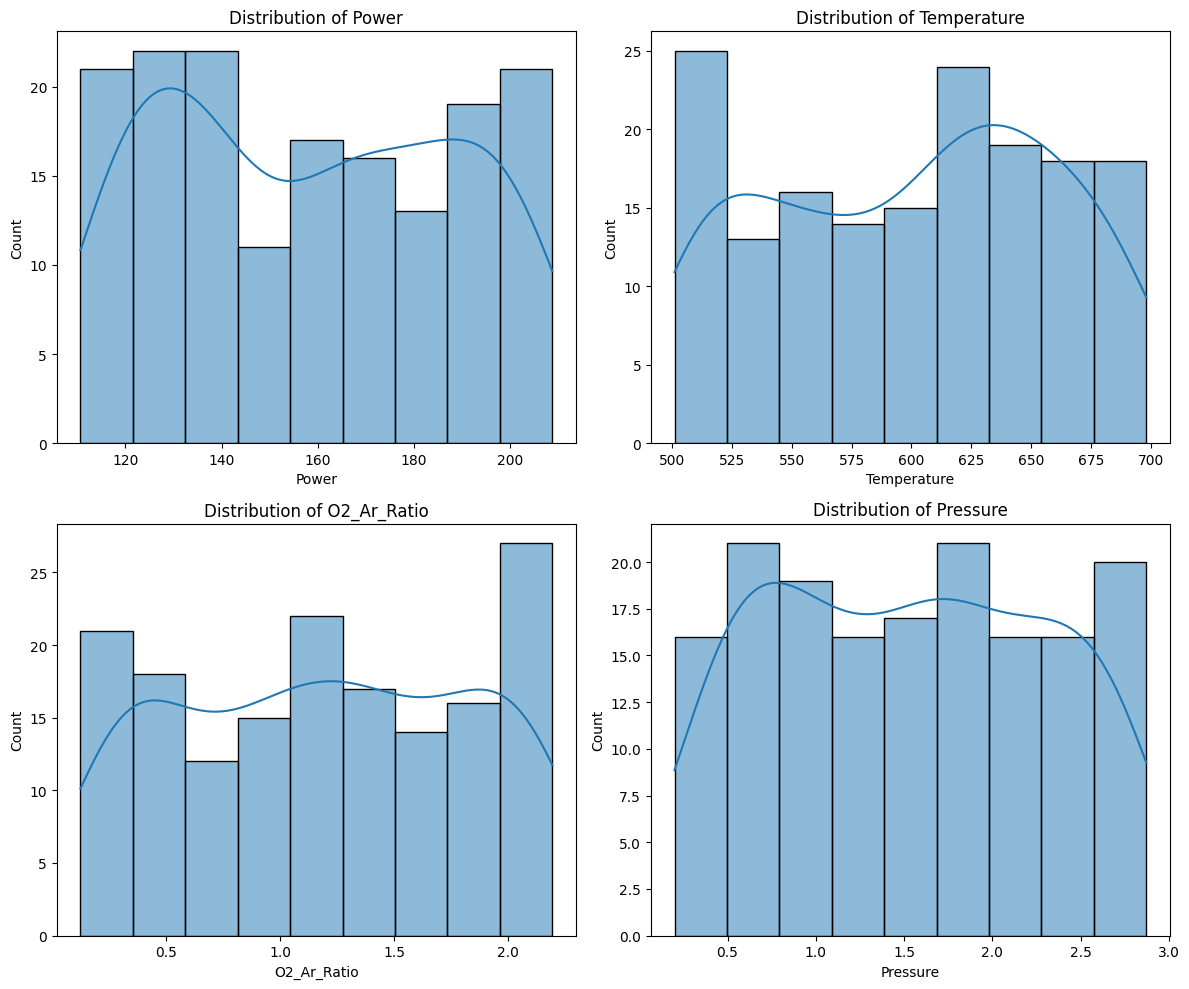

In [17]:
num_colms = ['Power', 'Temperature', 'O2_Ar_Ratio', 'Pressure']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each histogram on the corresponding subplot
for i, col in enumerate(num_colms):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

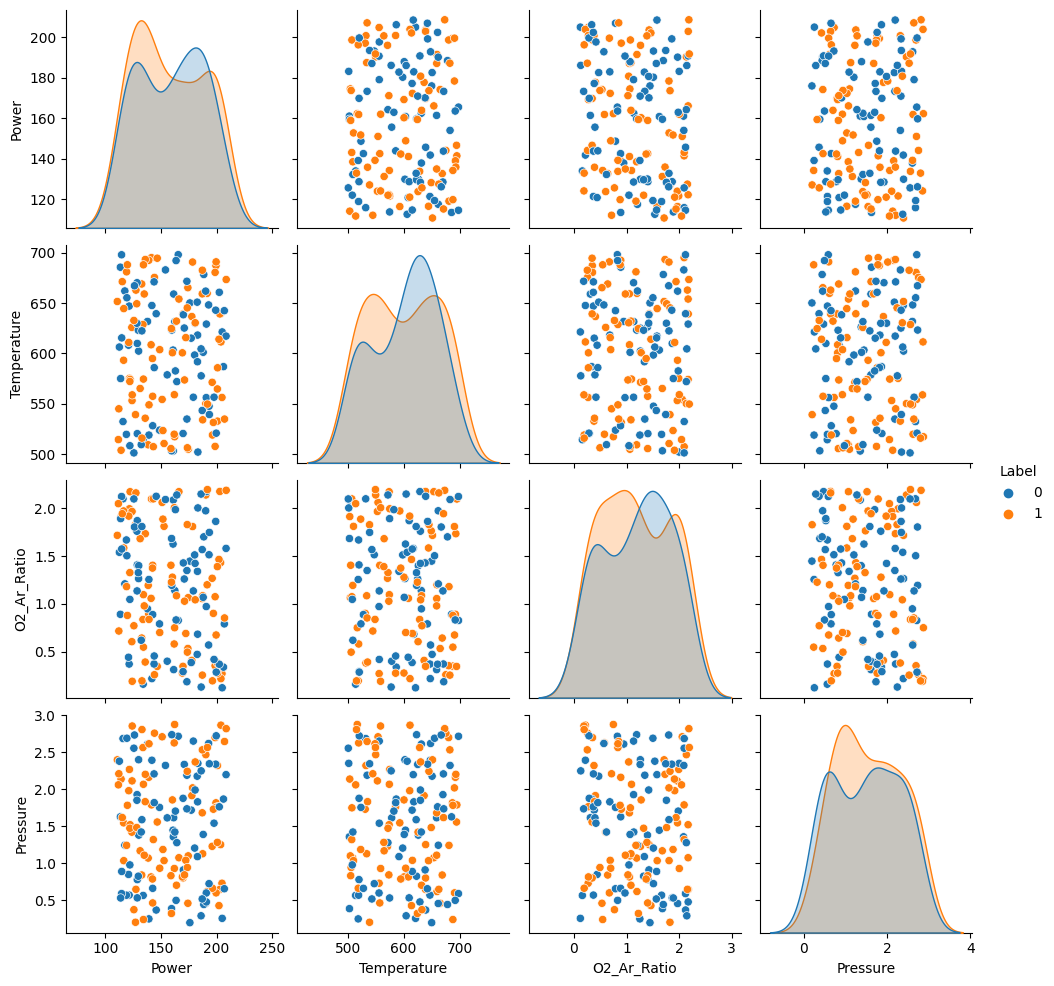

In [18]:
sns.pairplot(data, hue='Label', vars=num_colms, diag_kind='kde')
plt.show()

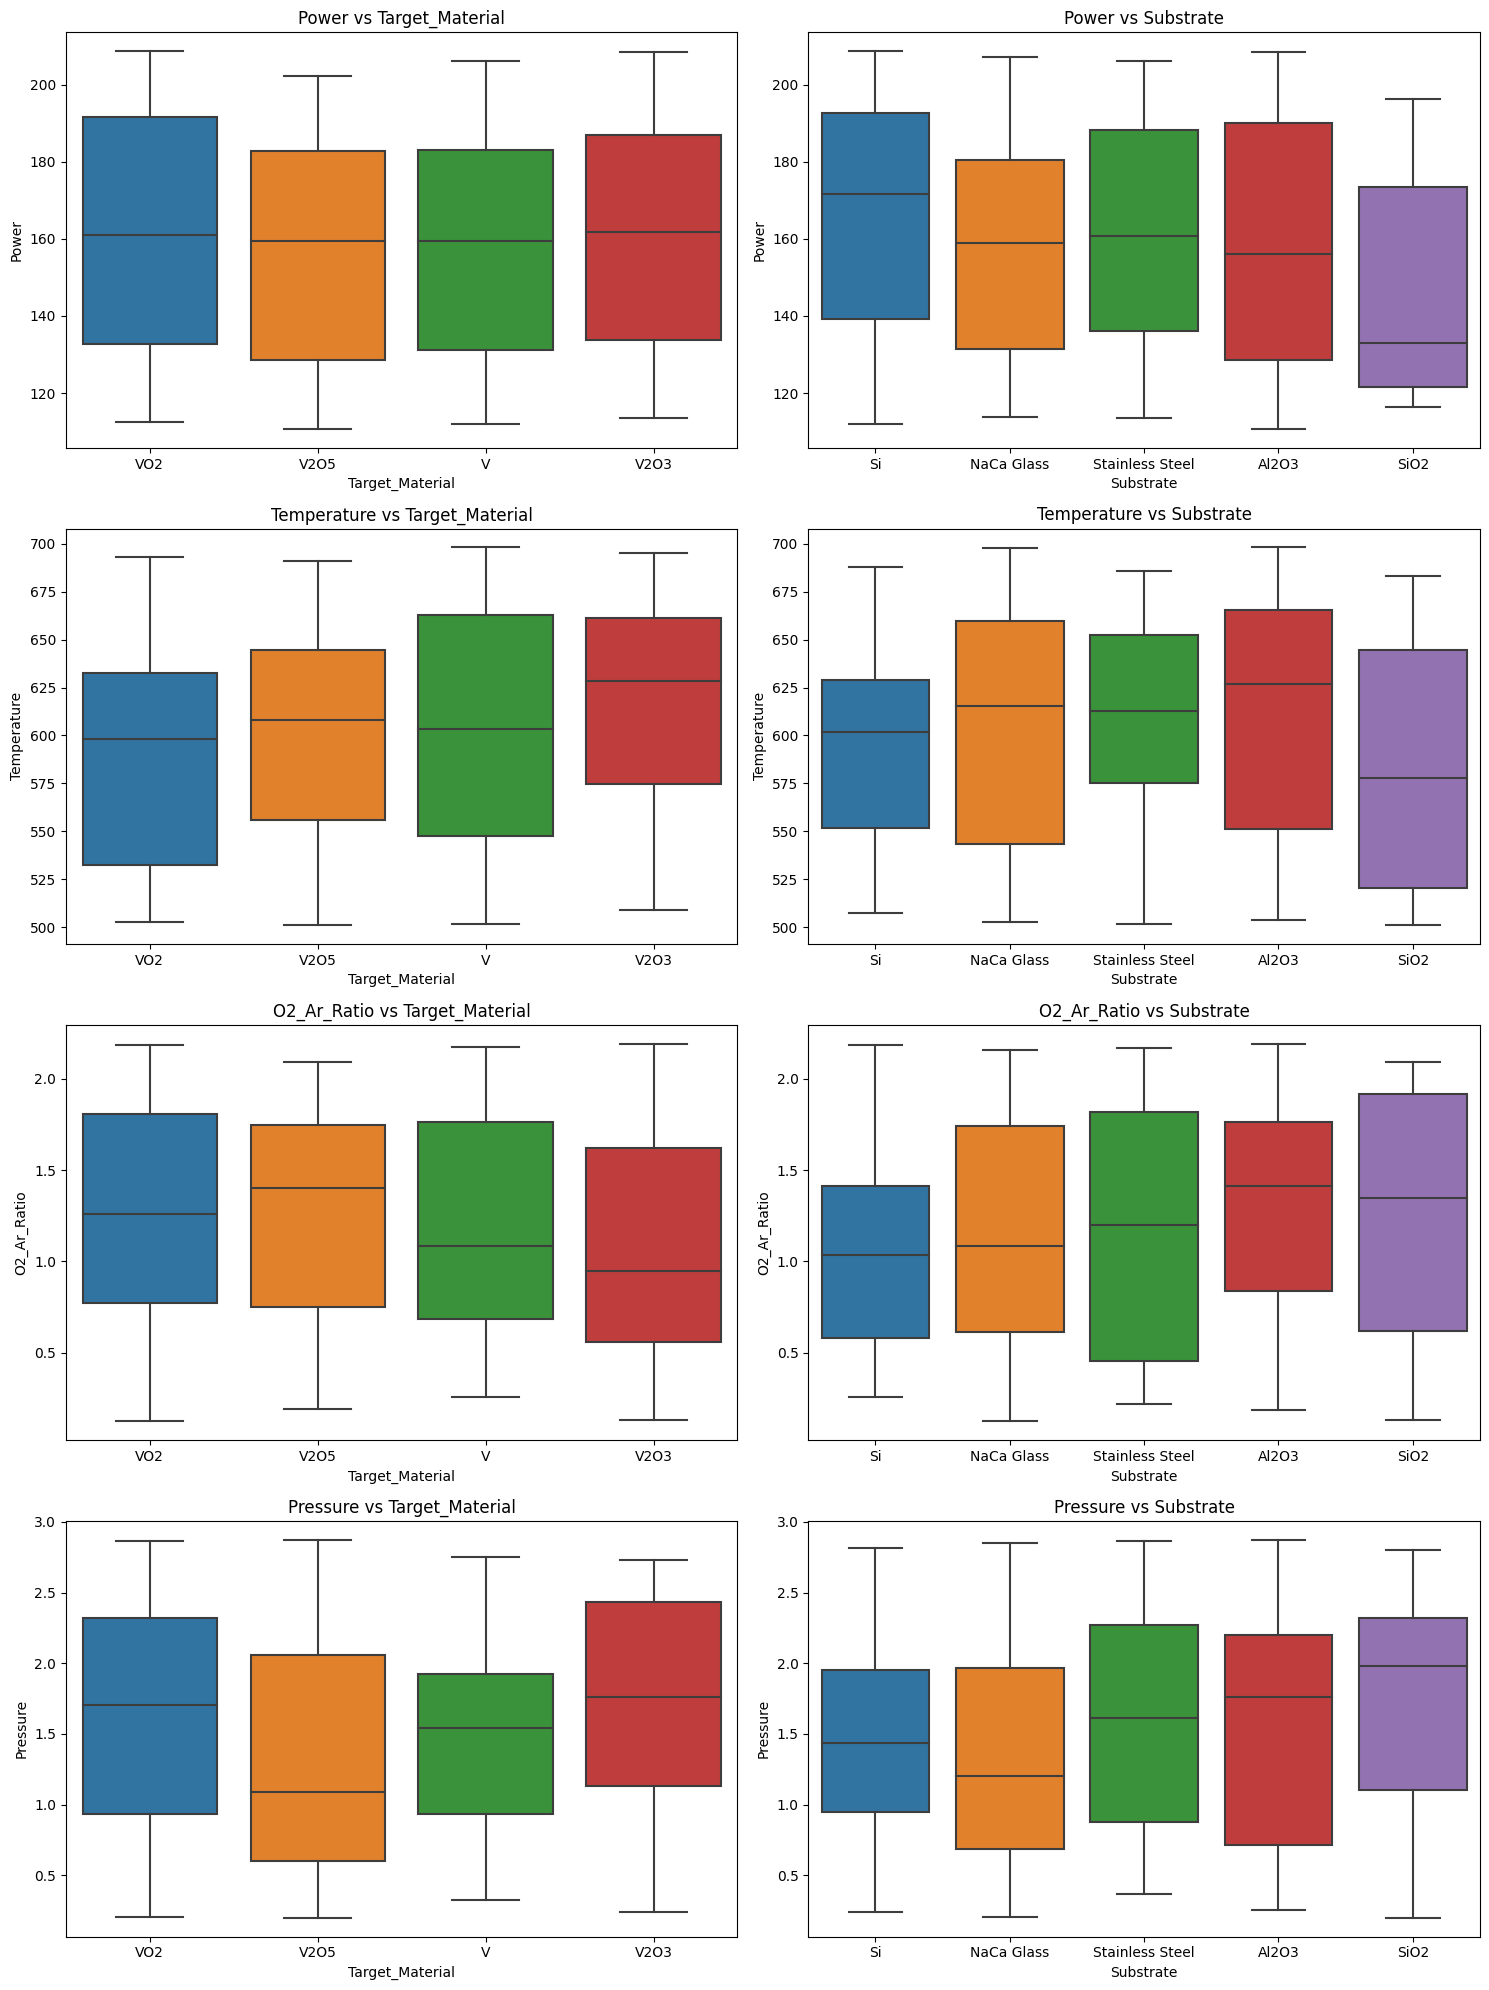

In [19]:
num_colms = ['Power', 'Temperature', 'O2_Ar_Ratio', 'Pressure']

# Create a 2x2 grid of subplots for each pair of box plots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each box plot on the corresponding subplot
for i, col in enumerate(num_colms):
    sns.boxplot(data=data, x='Target_Material', y=col, ax=axes[i*2])
    axes[i*2].set_title(f'{col} vs Target_Material')

    sns.boxplot(data=data, x='Substrate', y=col, ax=axes[i*2+1])
    axes[i*2+1].set_title(f'{col} vs Substrate')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

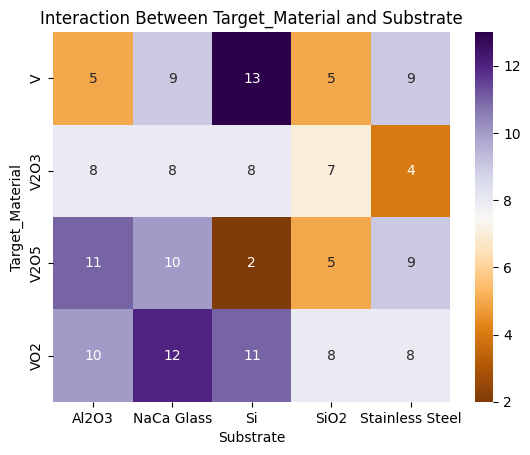

In [20]:
sns.heatmap(pd.crosstab(data['Target_Material'], data['Substrate']), annot=True, cmap='PuOr', fmt='d')
plt.title('Interaction Between Target_Material and Substrate')
plt.show()

### Creating new attributes

In [21]:
data['Power_to_Pressure'] = data['Power'] / data['Pressure']
data['Power_Temperature_Interaction'] = data['Power'] * data['Temperature']

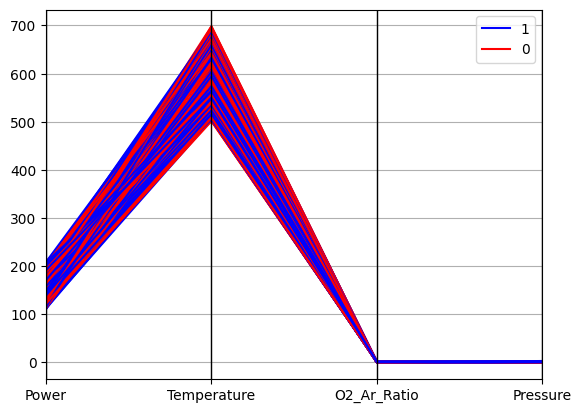

In [22]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data, class_column='Label', cols=num_colms, color=['b', 'r'])
plt.show()

## Reverting to a clean training set

In [23]:
data=strat_train_set.drop("Label", axis=1) # Back to the original
data_label=strat_train_set["Label"].copy()

In [24]:
data_num=data.drop(['Target_Material','Substrate'], axis=1)

## Making a custom pipeline for OneHotEncoding

In [25]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import LabelBinarizer

# class MyLabelBinarizer(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.binarizer = LabelBinarizer()

#     def fit(self, X, y=None):
#         self.binarizer.fit(X.ravel())  # Flattening if needed
#         return self

#     def transform(self, X):
#         print(f"Input shape: {X.shape}")  # Debugging statement
#         return self.binarizer.transform(X.ravel())

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class MyOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        print(f"Input shape: {X.shape}")  # Debugging statement
        transformed = self.encoder.transform(X)
        print(f"Output shape: {transformed.shape}")  # Debugging statement
        return transformed

## Transformation pipeline

In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(data_num)
cat_attribs=['Target_Material','Substrate']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', MyOneHotEncoder()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

In [28]:
# code for debugging
for name, transformer in full_pipeline.transformer_list:
    output = transformer.fit_transform(data)
    print(f"Transformer '{name}' output shape: {output.shape}")

Transformer 'num_pipeline' output shape: (162, 4)
Input shape: (162, 2)
Output shape: (162, 9)
Transformer 'cat_pipeline' output shape: (162, 9)


In [29]:
print(data.shape)

(162, 6)


In [30]:
prepared_data=full_pipeline.fit_transform(data)
prepared_data

Input shape: (162, 2)
Output shape: (162, 9)


array([[ 1.11902963,  0.99946689,  0.01465353, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.52586615,  0.65693631,  0.37917719, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2399436 , -0.77953781,  1.36837961, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.21458328, -1.55562101, -0.2251182 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.43595575, -0.45277305, -0.25490599, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.12759567, -0.85745277,  1.57958062, ...,  0.        ,
         0.        ,  0.        ]])

## Finding model for classification

In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C' : [0.1,1, 10, 100],
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'max_depth': [80, 90, 100, 110],
            'min_samples_split': [8, 10, 12],
            'n_estimators': [100, 200, 300, 1000]
        }
    },
    'KNeighboursClassifier':{
        'model' :KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']  
        }
    }

}

scores = []

In [32]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True, verbose=2)
    clf.fit(prepared_data, data_label)
    scores.append({
        
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, ke

In [33]:
result = pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
print(result)
print (clf.best_params_)

                   model  best_score  \
0                    svm    0.567803   
1    logistic_regression    0.538068   
2          random_forest    0.561364   
3  KNeighboursClassifier    0.573864   

                                         best_params  
0                        {'C': 100, 'kernel': 'rbf'}  
1                                           {'C': 1}  
2  {'max_depth': 80, 'min_samples_split': 12, 'n_...  
3  {'metric': 'minkowski', 'n_neighbors': 7, 'wei...  
{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}


In [34]:
print('Making predictions for the following in train set:')
predicted_values = clf.predict(prepared_data[0:10,:])
true_values = data_label[0:10]
print('True values are', list(true_values))
print('The predicted values are',predicted_values)
print('Diff',list(abs(predicted_values-true_values)))

Making predictions for the following in train set:
True values are [1, 1, 1, 1, 0, 1, 0, 0, 1, 0]
The predicted values are [1 1 1 1 0 1 0 0 1 0]
Diff [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Estimating final model on test set

In [35]:
test_data=strat_test_set.drop("Label", axis=1) # Back to the original
test_data_label=strat_test_set["Label"].copy()

In [36]:
final_model=clf.best_estimator_

prepared_test_data=full_pipeline.transform(test_data)

test_prediction=final_model.predict(prepared_test_data)

Input shape: (41, 2)
Output shape: (41, 9)


In [37]:
from sklearn.metrics import accuracy_score

df_test = data_label-clf.predict(prepared_data)
print('Average Train error', np.absolute(df_test).mean())

#Accuracy Score in Training set
testing_accuracy = accuracy_score(true_values,predicted_values,normalize=False)
print('Accuracy Score in Testing set', testing_accuracy)

Average Train error 0.0
Accuracy Score in Testing set 10


In [38]:
# Average training accuracy
training_accuracy = accuracy_score(data_label, clf.predict(prepared_data))
print('Average Training accuracy', training_accuracy)

# average Testing accuracy
testing_accuracy = accuracy_score(test_data_label, clf.predict(prepared_test_data))
print('Average Testing accuracy', testing_accuracy)

Average Training accuracy 1.0
Average Testing accuracy 0.6829268292682927


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrics for Testing')

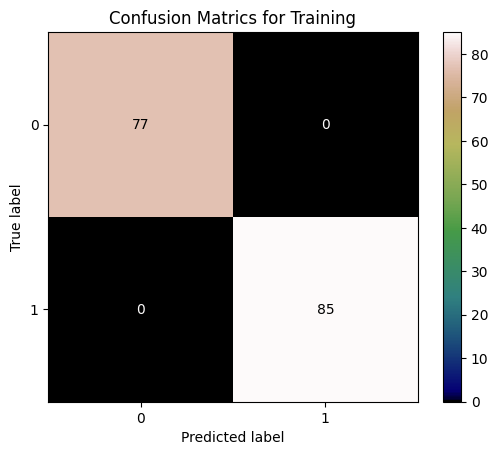

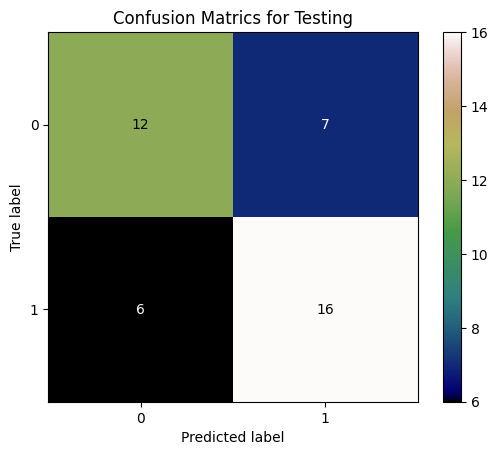

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#plot confusion matrics for trianing data inculding in the plot
cm_train = confusion_matrix(data_label, clf.predict(prepared_data))

ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_).plot(cmap='gist_earth', values_format='d')
plt.title("Confusion Matrics for Training")

#plot confusion matrics for testin data inculding in the plot
cm_test = confusion_matrix(test_data_label, clf.predict(prepared_test_data))

ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_).plot(cmap='gist_earth', values_format='d')
plt.title("Confusion Matrics for Testing")

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

precision = precision_score(test_data_label, clf.predict(prepared_test_data))
print("Precision:", precision)

Precision: 0.6956521739130435


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

recall = recall_score(test_data_label, clf.predict(prepared_test_data))
print("Recall:", recall)

Recall: 0.7272727272727273


In [43]:
F1 = f1_score(test_data_label, clf.predict(prepared_test_data))
print("F1:", F1)

F1: 0.711111111111111


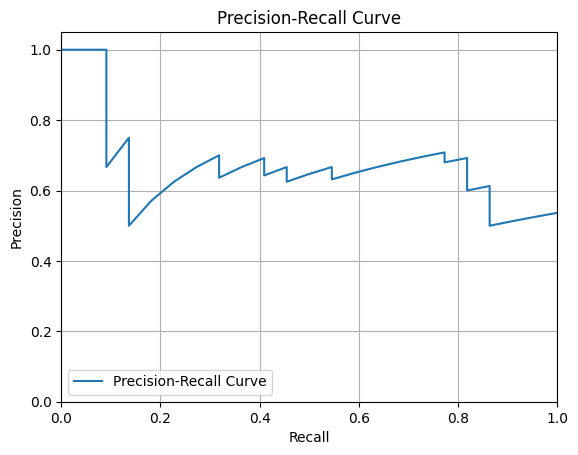

In [44]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#Predict probablities
y_score = clf.predict_proba(prepared_test_data)

# Compute precision recall and plot curve
precision, recall, thresholds = precision_recall_curve(test_data_label, y_score[:,1])

plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()